In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # 畫圖用
import seaborn as sns  # 畫圖用

In [2]:
%matplotlib inline

In [32]:
# 匯入iris資料集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns = iris['feature_names'])
print("target_names:" + str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns = ['target'])
iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data = iris_data[iris_data['target'].isin([0, 1])]
iris_data.head(3)

target_names:['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [33]:
# 通常在建立model時會用train_test_split把資料分為七三筆，七是train model剩下的三來看model好不好
from sklearn.model_selection import train_test_split

In [34]:
# 把資料切割x, y的train, test
# 使用的特徵是: 花萼的長度&花瓣長度
x_train, x_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)', 'petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [35]:
# random_state=0:隨機找資料做training，可以看到x_train的index是隨機的
print("x_train筆數:" + str(len(x_train)))
x_train

x_train筆數:70


,sepal length (cm),petal length (cm)
60,5.0,3.5
80,5.5,3.8
90,5.5,4.4
68,6.2,4.5
51,6.4,4.5
...,...,...
96,5.7,4.2
67,5.8,4.1
64,5.6,3.6
47,4.6,1.4


In [36]:
# 前面70%筆資料做train，剩下的30%可以看這個model的正確率是多少，可以知道未來的預測正確率大概會是多少
print("x_test筆數:" + str(len(x_test)))
x_test

x_test筆數:30


,sepal length (cm),petal length (cm)
26,5.0,1.6
86,6.7,4.7
2,4.7,1.3
55,5.7,4.5
75,6.6,4.4
93,5.0,3.3
16,5.4,1.3
73,6.1,4.7
54,6.5,4.6
95,5.7,4.2


In [37]:
"""
在做Logistic Regression的時候要打特徵範圍(sacle)縮小到一樣的範圍，可以都縮小0~1之間，
或是用StandardScaler，把資料標準化
"""

# 資料標準畫:值減掉平均，除上標準差
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [38]:
x_train_std

array([[-0.80800774,  0.43666598],
       [ 0.01648995,  0.64460217],
       [ 0.01648995,  1.06047453],
       [ 1.17078673,  1.12978659],
       [ 1.50058581,  1.12978659],
       [-0.47820866, -0.94957523],
       [ 0.34628903, -0.81095111],
       [ 1.33568627,  1.26841071],
       [ 1.00588719,  1.26841071],
       [ 1.50058581,  0.99116247],
       [-0.97290728, -1.01888729],
       [ 0.67608811,  0.92185041],
       [-1.79740498, -1.08819936],
       [-1.63250544, -1.08819936],
       [-0.80800774, -1.01888729],
       [ 0.34628903, -0.94957523],
       [-0.6431082 , -1.01888729],
       [-0.80800774, -1.08819936],
       [-1.79740498, -1.08819936],
       [-0.14840959, -0.81095111],
       [ 1.00588719,  1.19909865],
       [-0.47820866,  0.71391423],
       [-0.6431082 , -1.01888729],
       [-0.97290728, -0.94957523],
       [-0.47820866, -1.01888729],
       [ 2.48998304,  1.26841071],
       [-1.13780682, -0.88026317],
       [-0.80800774, -1.15751142],
       [-0.6431082 ,

In [39]:
# 接著用LaTex寫Sigmoid(Logistic) function
from IPython.display import Math

In [40]:
Math(r'z=w^Tx')

<IPython.core.display.Math object>

In [41]:
Math(r'\phi{(z)}=\cfrac{1}{1+e^{-z}}')

<IPython.core.display.Math object>

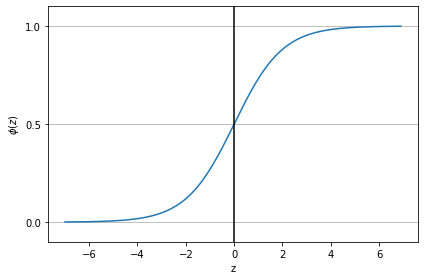

In [42]:
# sigmoid函式圖型

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# 
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()

In [43]:
# 引入Logistic Regression
from sklearn.linear_model import LogisticRegression

In [44]:
y_train['target'].values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

In [45]:
y_train

,target
60,1
80,1
90,1
68,1
51,1
...,...
96,1
67,1
64,1
47,0


In [46]:
# 做LogisticRegression的時候基本不用設定參數
lr = LogisticRegression()
lr.fit(x_train_std, y_train['target'].values)

LogisticRegression()

In [47]:
# 看預測: .predict()
lr.predict(x_test_std)  # 放標準化後的資料

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [48]:
# 拿來檢驗的資料
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [49]:
# 寫一個迴圈檢測預測率如何
error = 0

# i是enumerate的index, v是enumerate的value (enumerate回傳的是list的(index,value))
for i, v in enumerate(lr.predict(x_test_std)):
    if v != y_test['target'].values[i]:
        error += 1
print("error:", error)

error: 0


看到預測結果error=0沒有不一樣，所以test_data和預測正確率是很好的幾乎100%

In [50]:
# 如果要看實際的機率的話，要用predict_proba()，看實際預測成A類的機率是多少
lr.predict_proba(x_test_std)

array([[0.93606171, 0.06393829],
       [0.00497007, 0.99502993],
       [0.97297313, 0.02702687],
       [0.01892083, 0.98107917],
       [0.01007719, 0.98992281],
       [0.30602173, 0.69397827],
       [0.94913163, 0.05086837],
       [0.0086973 , 0.9913027 ],
       [0.00735109, 0.99264891],
       [0.03454645, 0.96545355],
       [0.06120019, 0.93879981],
       [0.04688146, 0.95311854],
       [0.01434288, 0.98565712],
       [0.9875209 , 0.0124791 ],
       [0.94733967, 0.05266033],
       [0.94642148, 0.05357852],
       [0.98655365, 0.01344635],
       [0.90494712, 0.09505288],
       [0.93254052, 0.06745948],
       [0.97489243, 0.02510757],
       [0.93606171, 0.06393829],
       [0.03916972, 0.96083028],
       [0.96322075, 0.03677925],
       [0.03578511, 0.96421489],
       [0.96386204, 0.03613796],
       [0.93138299, 0.06861701],
       [0.96986241, 0.03013759],
       [0.04211754, 0.95788246],
       [0.05699625, 0.94300375],
       [0.00368696, 0.99631304]])

可以看到第0筆資料[0.93606171, 0.06393829]:預測成0的機率是0.936，預測成1的機率是0.06，所以是0   
第1筆資料[0.00497007, 0.99502993]:預測成0的機率是0.004，預測成1的機率是0.995，所以是1   
跟y_test['target'].values結果一樣

### 視覺化圖型

In [ ]:
# train完的model用視覺化的方式看結果
# Python機器學習書上的方法:plot_decision_regions()

from matplotlib.colors import ListedColormap

def plot_decision_regions():
    



In [ ]:
plot_decision_regions(x_train_std, y_train['target'], classifier=lr)
plt.xlabel('sepal length Standardized')
plt.ylabel('petal length Standardized')